**Heart Attack - Prediction**

---



---



Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

DATA SOURCE

In [ ]:
df= pd.read_excel("CardioVasc.xlsx")

In [ ]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

**Observations**

The age ranges from 29 to 77

The avg bp is 130 and can vary upto 200

Avg serum cholestrol is 246 and can vary upto 564



Checking Variable Nature

Check for missing data

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ba7e3c7d0>,
      dtype=object)

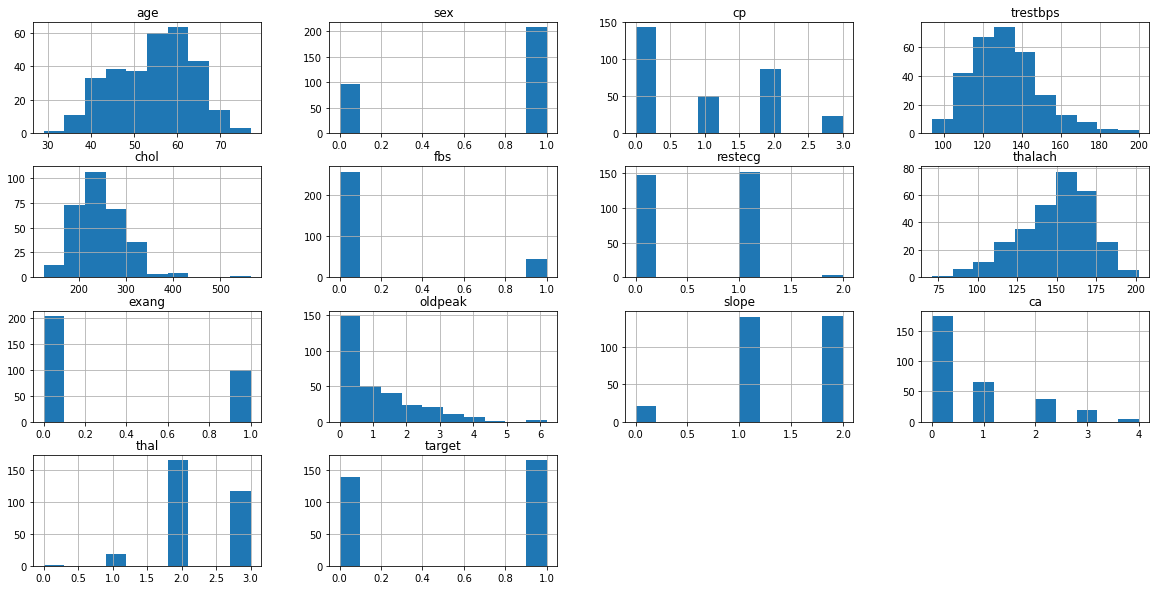

In [ ]:
df.hist(figsize=(20,10))

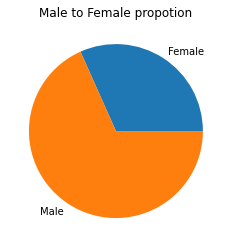

In [ ]:
x=df.groupby('sex')['sex'].count()
plt.pie(x,labels=['Female','Male'])
plt.title ("Male to Female propotion")
plt.show()

In [ ]:
df2 =df[['cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal'	]]

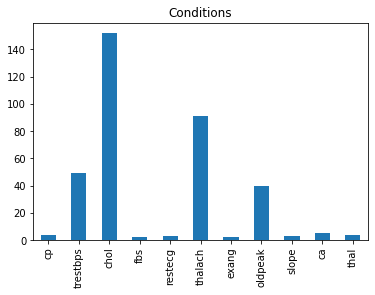

In [ ]:

df2.nunique().plot(kind='bar',title="Conditions")

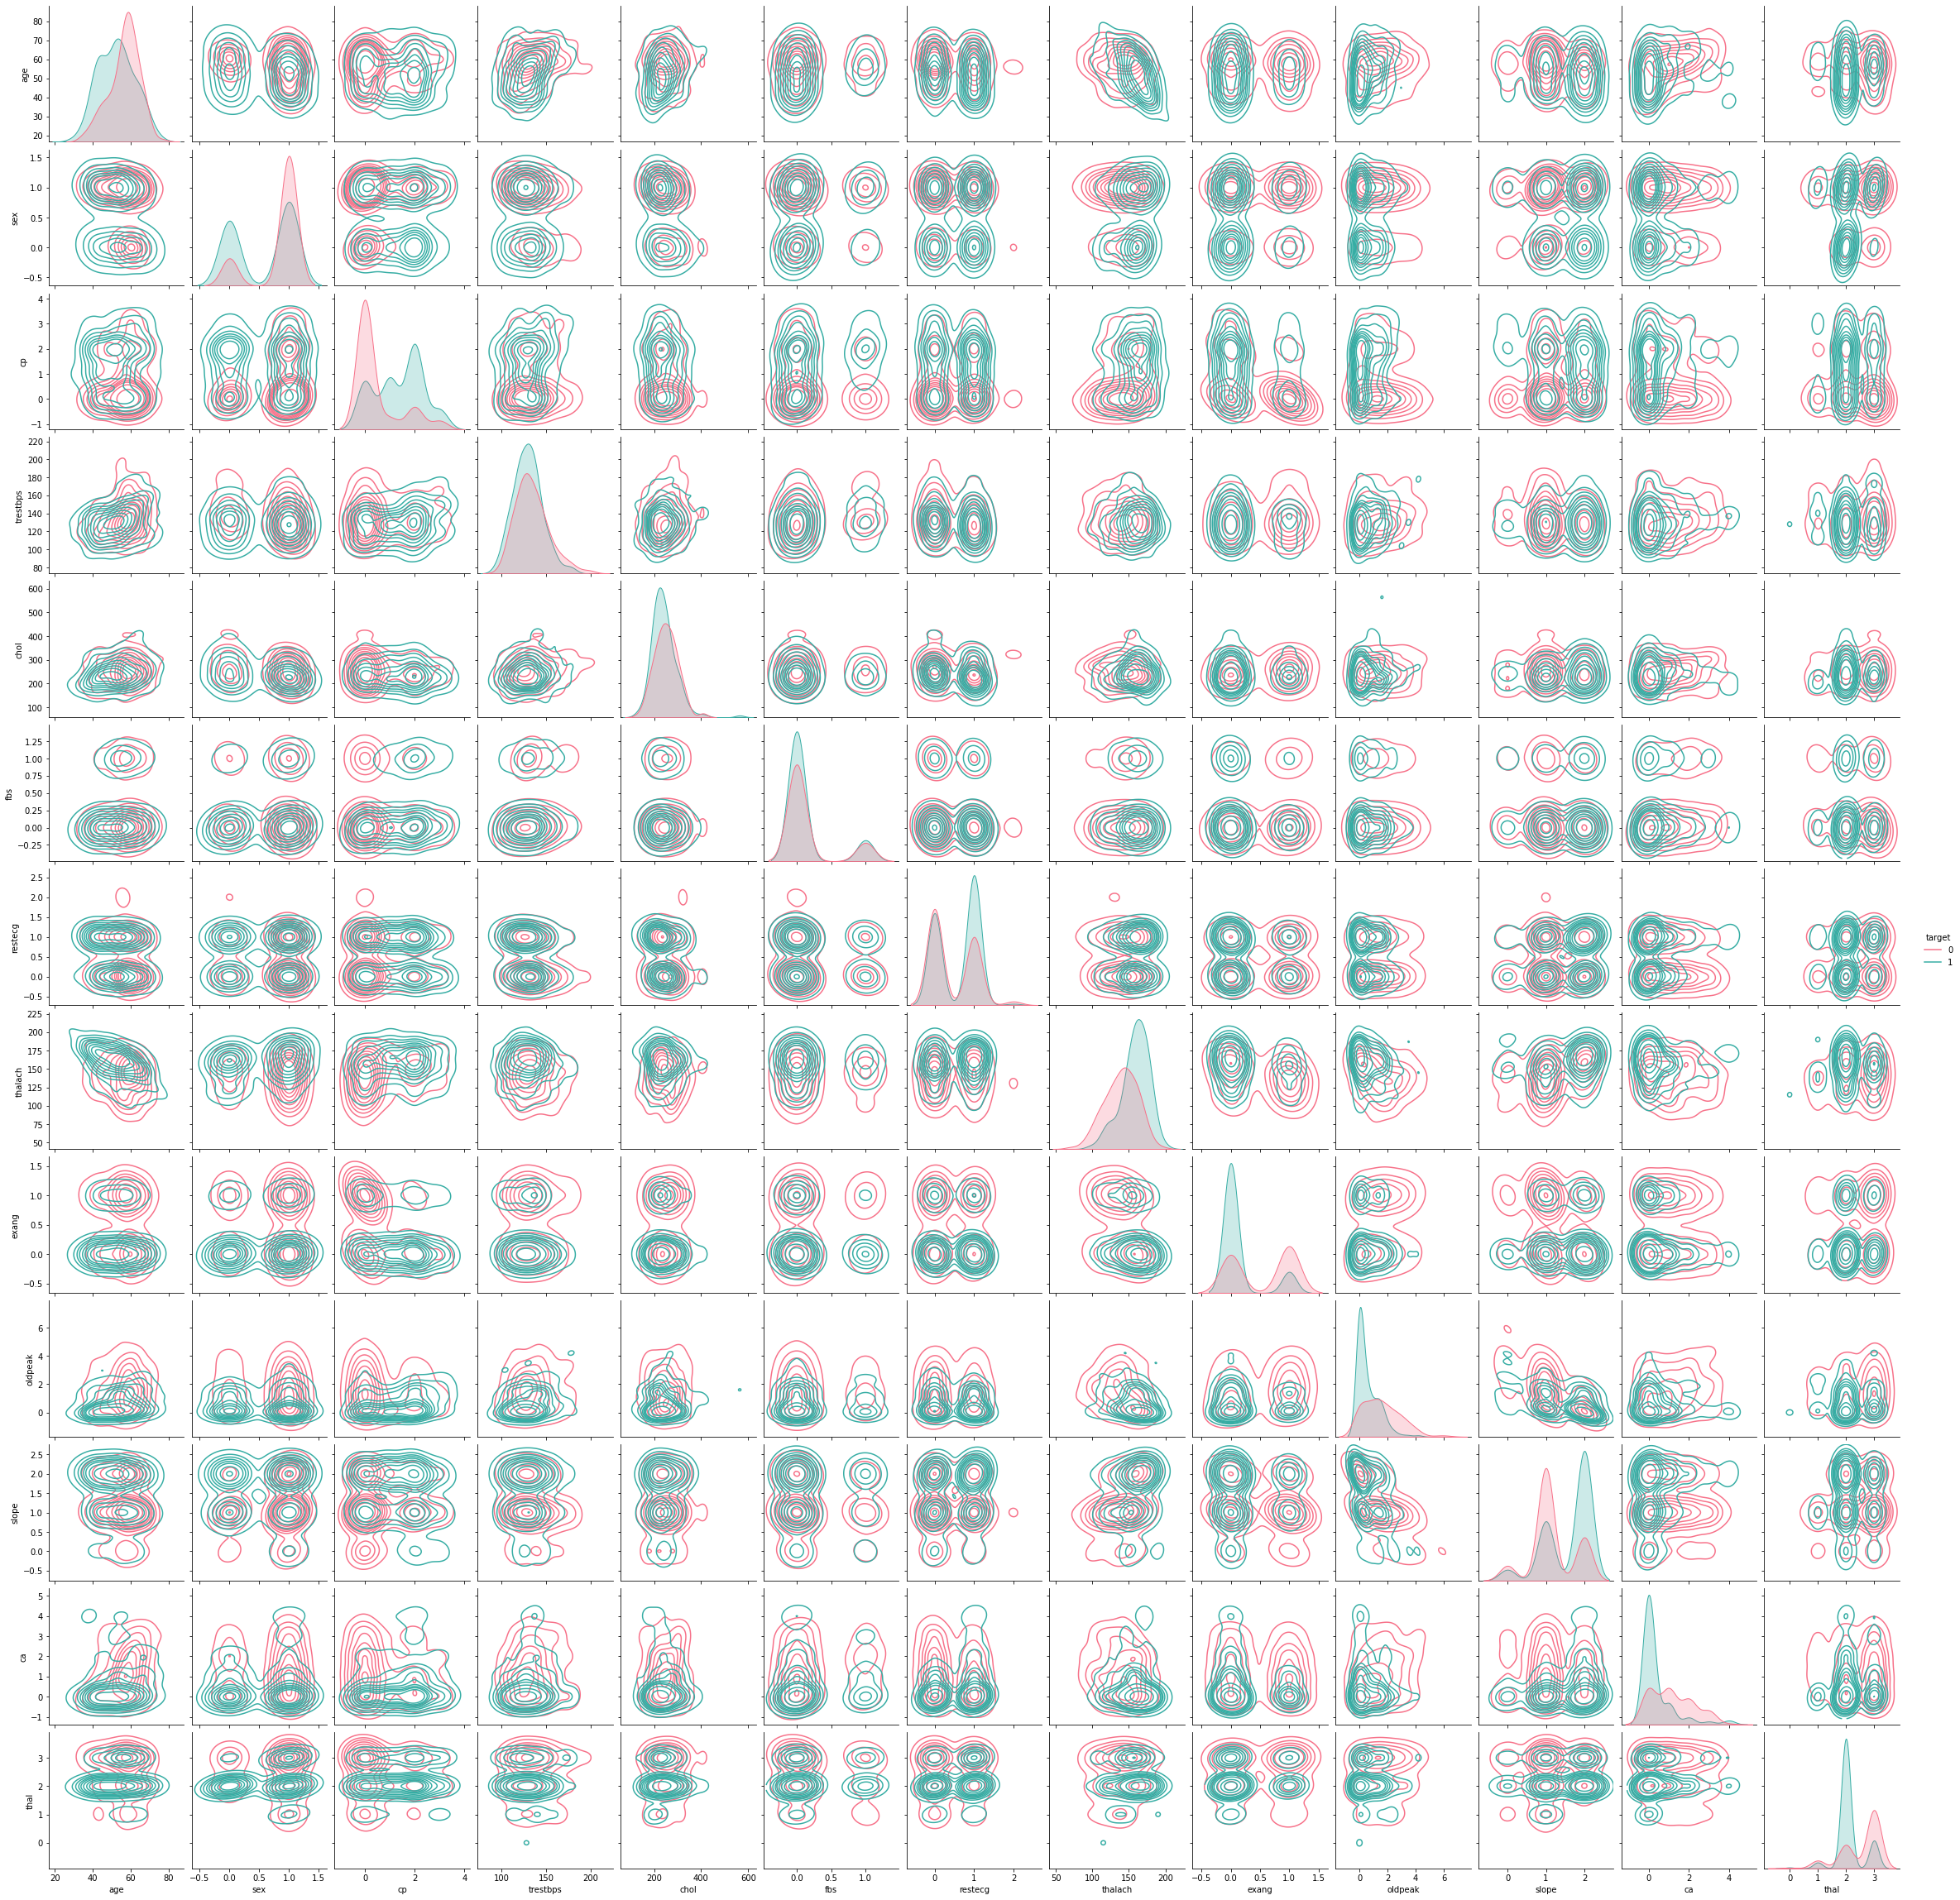

In [ ]:
sns.pairplot(df,kind="kde",hue="target", palette='husl')

In [ ]:
cor = df.corr()
matrix = np.triu(cor)

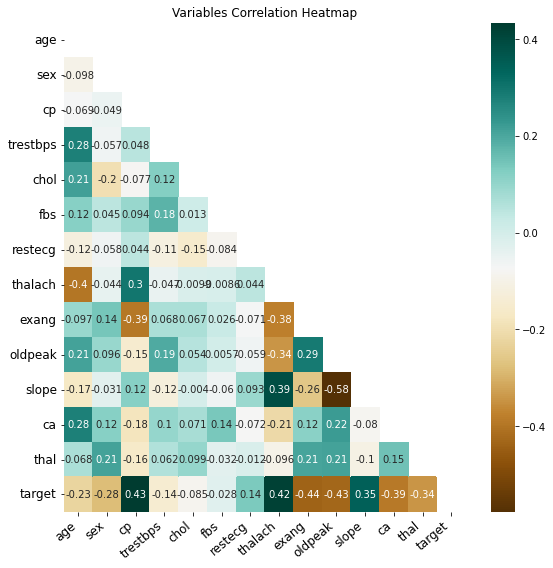

In [ ]:
plt.figure(figsize=(9,9))
heatmap = sns.heatmap(cor,annot=True,mask=matrix,cmap='BrBG')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=40, ha='right', fontsize=12)
plt.title("Variables Correlation Heatmap")
plt.show()

In [ ]:
import scipy.stats as stats

from sklearn.model_selection import train_test_split

Multi Colinearinty

To identify correlation between independent variables

Correlation on scatterplot

Few variables show positive and negative correlation.. plotting them on a scatterplot.

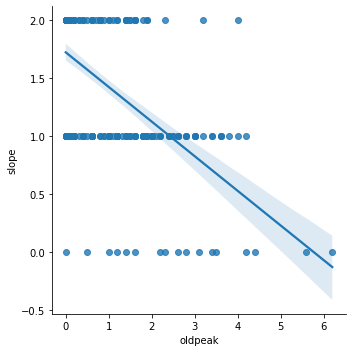

In [ ]:
sns.lmplot(x='oldpeak', y='slope', data=x_train)
plt.show()

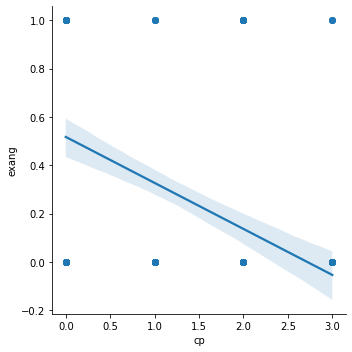

In [ ]:
sns.lmplot(x='cp', y='exang', data=x_train)
plt.show()

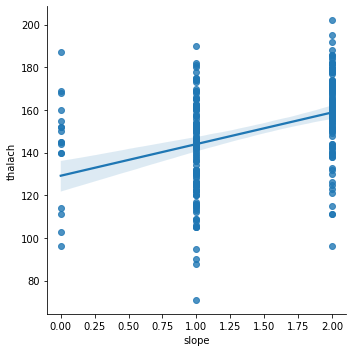

In [ ]:
sns.lmplot(x='slope', y='thalach', data=x_train)
plt.show()

Splitting the Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                   df['target'],
                                                   test_size=0.15,
                                                   random_state=0)

x_train.shape, x_test.shape

((257, 13), (46, 13))

In [ ]:
# make a list of numerical variables: discrete variable and continuous variable

dis_var = [var for var in x_train.columns if x_train[var].nunique() < 10]
cont_var = [var for var in x_train.columns if var not in dis_var]

In [ ]:
dis_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [ ]:
cont_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Discrete to categorical

In [ ]:
for var in dis_var:
    x_train[var] = x_train[var].astype('O')

In [ ]:
for var in dis_var:
    x_test[var] = x_test[var].astype('O')

In [ ]:
for var in x_train.columns:
    if x_train[var].dtype == 'O':
        print(x_train.groupby([var])[var].count()/len(x_train))

sex
0    0.338521
1    0.661479
Name: sex, dtype: float64
cp
0    0.466926
1    0.163424
2    0.291829
3    0.077821
Name: cp, dtype: float64
fbs
0    0.856031
1    0.143969
Name: fbs, dtype: float64
restecg
0    0.490272
1    0.494163
2    0.015564
Name: restecg, dtype: float64
exang
0    0.669261
1    0.330739
Name: exang, dtype: float64
slope
0    0.066148
1    0.455253
2    0.478599
Name: slope, dtype: float64
ca
0    0.591440
1    0.202335
2    0.128405
3    0.062257
4    0.015564
Name: ca, dtype: float64
thal
0    0.007782
1    0.066148
2    0.560311
3    0.365759
Name: thal, dtype: float64


Random Forest Classifier

In [ ]:
# importing models

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
acc= []

In [ ]:
rfc = RandomForestClassifier(criterion='entropy', random_state=0)
rfc.fit(x_train,y_train)

y_rfc_bs = rfc.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_rfc_bs))
print('\n')
print(classification_report(y_test,y_rfc_bs))
print('\n')
a1=accuracy_score(y_test,y_rfc_bs)
print("Accuracy: ",a1)
acc.append(a1)

[[20  3]
 [ 5 18]]


              precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.86      0.78      0.82        23

    accuracy                           0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.83      0.83      0.83        46



Accuracy:  0.8260869565217391


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression()
lm.fit(x_train,y_train)
y_lm_bs = lm.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(confusion_matrix(y_test,y_lm_bs))
print('\n')
print(classification_report(y_test,y_lm_bs))
print('\n')
a2 = accuracy_score(y_test,y_lm_bs)
print("Accuracy: ", a2)
acc.append(a2)

[[20  3]
 [ 3 20]]


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.87      0.87      0.87        23

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



Accuracy:  0.8695652173913043


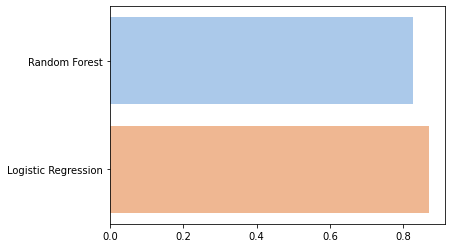

In [ ]:
key=['Random Forest','Logistic Regression']

sns.barplot(x = acc, y = key, palette='pastel')